In [1]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt

from probability import *
from hilbert_transform import *
from spectral_transforms import *
from numerical import *
from plotting import *

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=8)
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r"\usepackage{amsfonts}" + "\n" + r"\usepackage{amsmath}" + "\n" + r"\usepackage{amssymb}"
})

### Show continuity of map $\mathcal{B}_\mathbb{R}[\lambda^{(n)}, c_0, c_1] \to \mathcal{B}_\mathbb{R}[\lambda, c_0, c_1]$

N
(0, 1)
left and right roots found


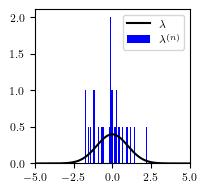

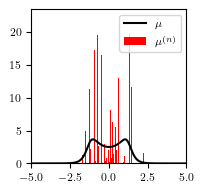

In [36]:
N = 50
mu = 0
sigma = 1
print("N")

lower = -5*sigma
upper = 5*sigma

quad_pts, quad_wts = trap_quad(lower, upper, 1000)
density = lambda x: np.exp(-x**2/(2*sigma**2)) / np.sqrt(2*math.pi*sigma**2)
lmbda = Distribution(density, quad_pts=quad_pts, quad_wts=quad_wts)

X = mu + sigma*np.random.randn(N)
lmbda_sampled = Distribution(None, X, np.ones(N)/N)

c0 = 0
c1 = 1
print(f"({c0}, {c1})")

mu, zeta0, zeta1 = B_real(lmbda, c0, c1)
mu_sampled, zeta0_sampled, zeta1_sampled = B_real(lmbda_sampled, c0, c1)

bins = 100

fig, ax = plt.subplots(figsize=(2, 2))
hist, bin_edges = np.histogram(lmbda_sampled.atoms, weights=lmbda_sampled.atom_wts, bins=bins)
ax.bar(x=bin_edges[:-1], height=hist/np.diff(bin_edges), width=np.diff(bin_edges), color="blue", align='edge')
ax.plot(quad_pts, lmbda.density(quad_pts), color="k")
ax.set_xlim(lower, upper)
ax.legend(["$\lambda$", "$\lambda^{(n)}$"], loc="upper right")
plt.savefig(f"figures/lambda_inverse_cont_N={N}.pdf", bbox_inches='tight', pad_inches=0.0)
plt.show()

fig, ax = plt.subplots(figsize=(2, 2))
hist, bin_edges = np.histogram(mu_sampled.atoms, weights=mu_sampled.atom_wts, bins=bins)
ax.bar(x=bin_edges[:-1], height=hist/np.diff(bin_edges), width=np.diff(bin_edges), color="red", align='edge')
ax.plot(quad_pts, mu.density(quad_pts), color="k")
ax.set_xlim(lower, upper)
ax.legend(["$\mu$", "$\mu^{(n)}$"], loc="upper right")
plt.savefig(f"figures/mu_inverse_cont_N={N}.pdf", bbox_inches='tight', pad_inches=0.0)
plt.show()